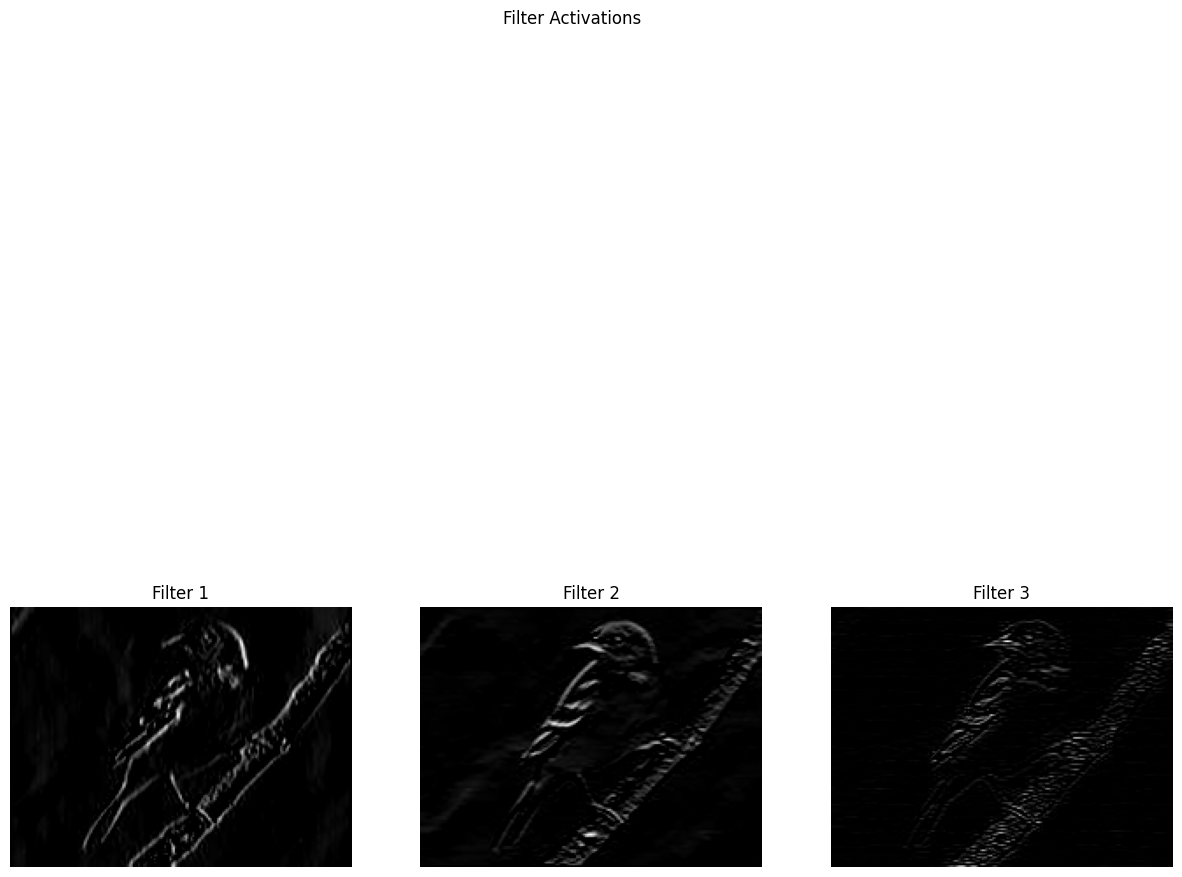

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('bird.jpeg', cv2.IMREAD_GRAYSCALE)  # Grayscale for simplicity

# Normalize the image to [0, 1]
image = image / 255.0

# Define multiple filters (e.g., edge detectors, blurs, etc.)
filters = np.array([
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],  # Horizontal edge detector
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],  # Vertical edge detector
    [[-1, -1, -1], [2, 2, 2], [-1, -1, -1]],  # Sharpening filter
])

# Function to visualize activations (convolutions)
def visualize_activations(image, filters):
    # Number of filters
    num_filters = filters.shape[0]
    
    # Create a plot for each filter
    fig, axes = plt.subplots(1, num_filters, figsize=(15, 15))
    fig.suptitle('Filter Activations')

    # Apply each filter and visualize the activation
    for i in range(num_filters):
        filter = filters[i]
        
        # Apply convolution for each filter
        activation = cv2.filter2D(image, -1, filter)
        
        # Apply ReLU (optional)
        activation_relu = np.maximum(activation, 0)
        
        # Show activation for this filter
        axes[i].imshow(activation_relu, cmap='gray')
        axes[i].set_title(f'Filter {i + 1}')
        axes[i].axis('off')

    # Display all activations
    plt.show()

# Visualize the activations
visualize_activations(image, filters)


In [ ]:
Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Iteration 1/20, Loss: 0.06276299059391022
Iteration 2/20, Loss: 1.518479585647583
Iteration 3/20, Loss: 7.4072065353393555
Iteration 4/20, Loss: 15.073760032653809
Iteration 5/20, Loss: 27.222740173339844
Iteration 6/20, Loss: 40.732051849365234
Iteration 7/20, Loss: 55.1053581237793
Iteration 8/20, Loss: 76.8655014038086
Iteration 9/20, Loss: 96.0077896118164
Iteration 10/20, Loss: 120.34555053710938
Iteration 11/20, Loss: 138.12986755371094
Iteration 12/20, Loss: 162.1295166015625
Iteration 13/20, Loss: 190.45240783691406
Iteration 14/20, Loss: 219.887939453125
Iteration 15/20, Loss: 244.46856689453125
Iteration 16/20, Loss: 275.5161437988281
Iteration 17/20, Loss: 302.7598571777344
Iteration 18/20, Loss: 331.2652893066406
Iteration 19/20, Loss: 364.3894348144531
Iteration 20/20, Loss: 397.2885437011719

In [ ]:
Raw output before softmax: [  2832.15022323  25883.30059681  35269.63947753  -4696.31398892
 -30304.89817218 -19921.77156737 -29253.47910968 -32046.04913042
 -29782.84693083   2274.30446195]
Softmax probabilities: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

1/1 [==============================] - 1s 636ms/step


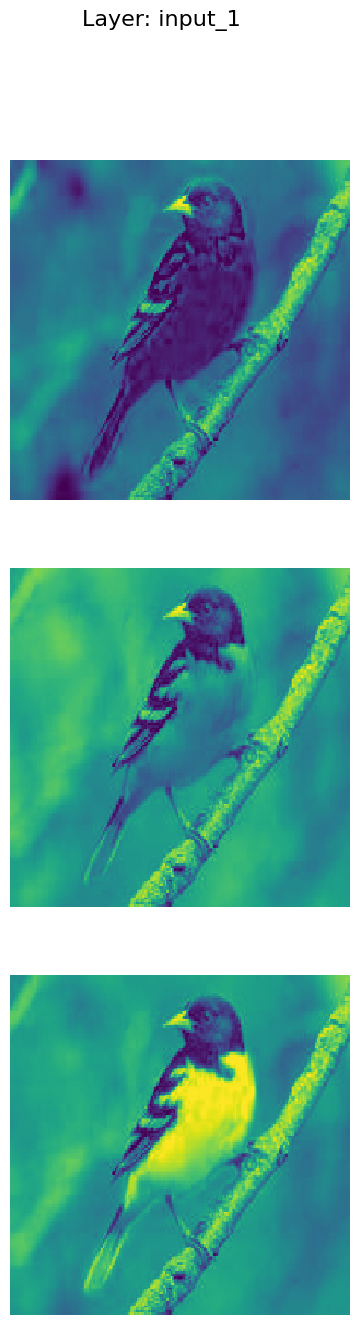

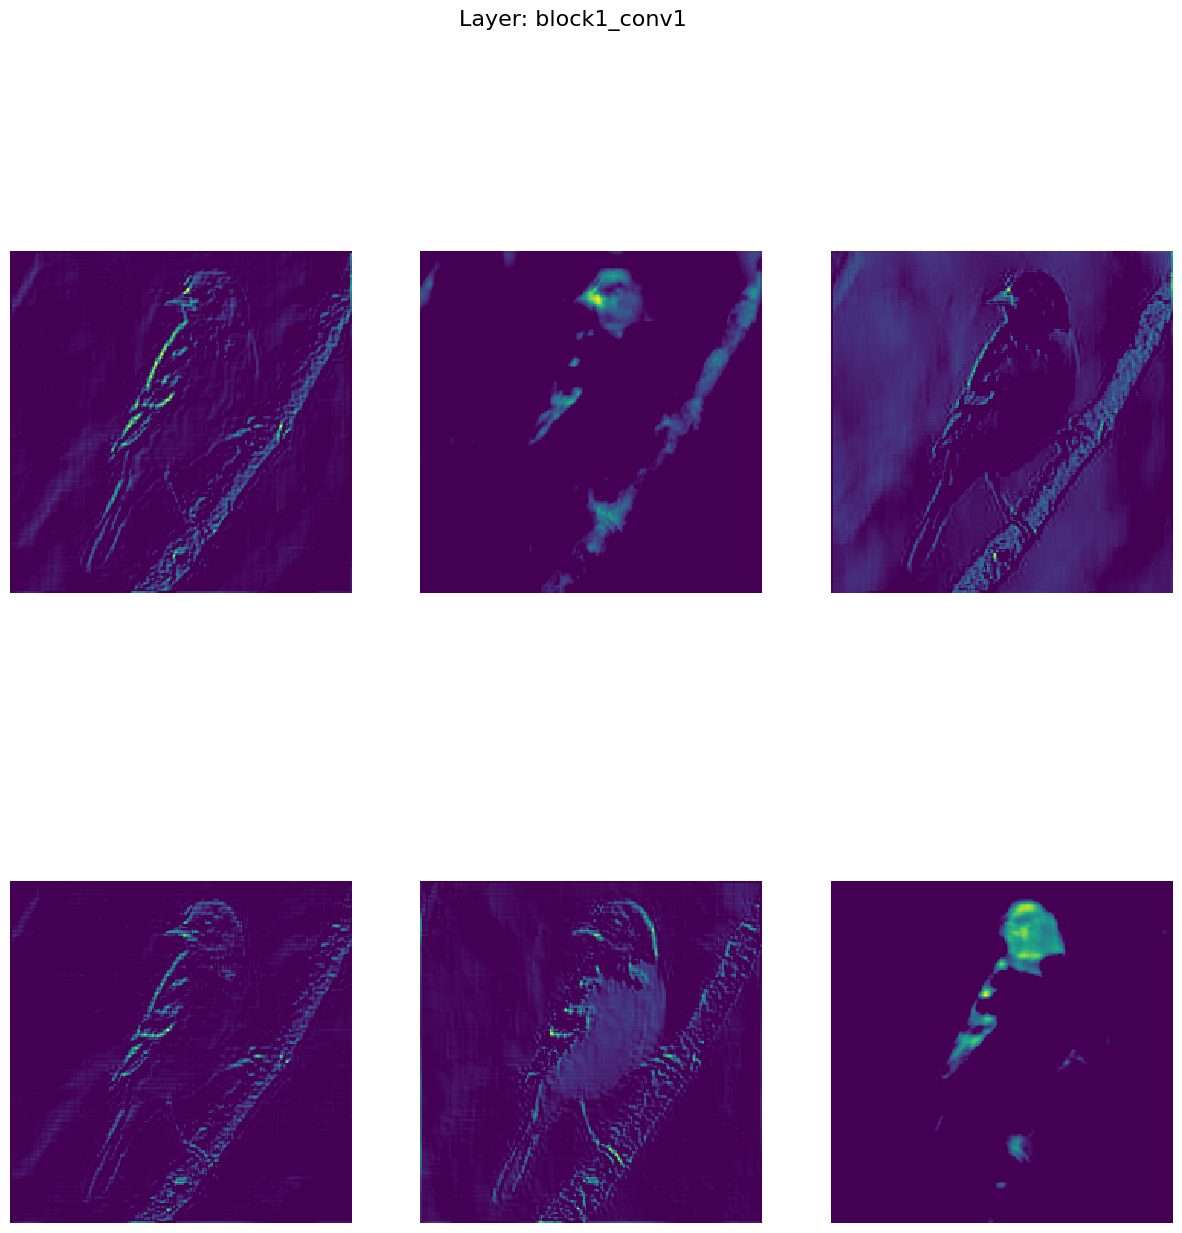

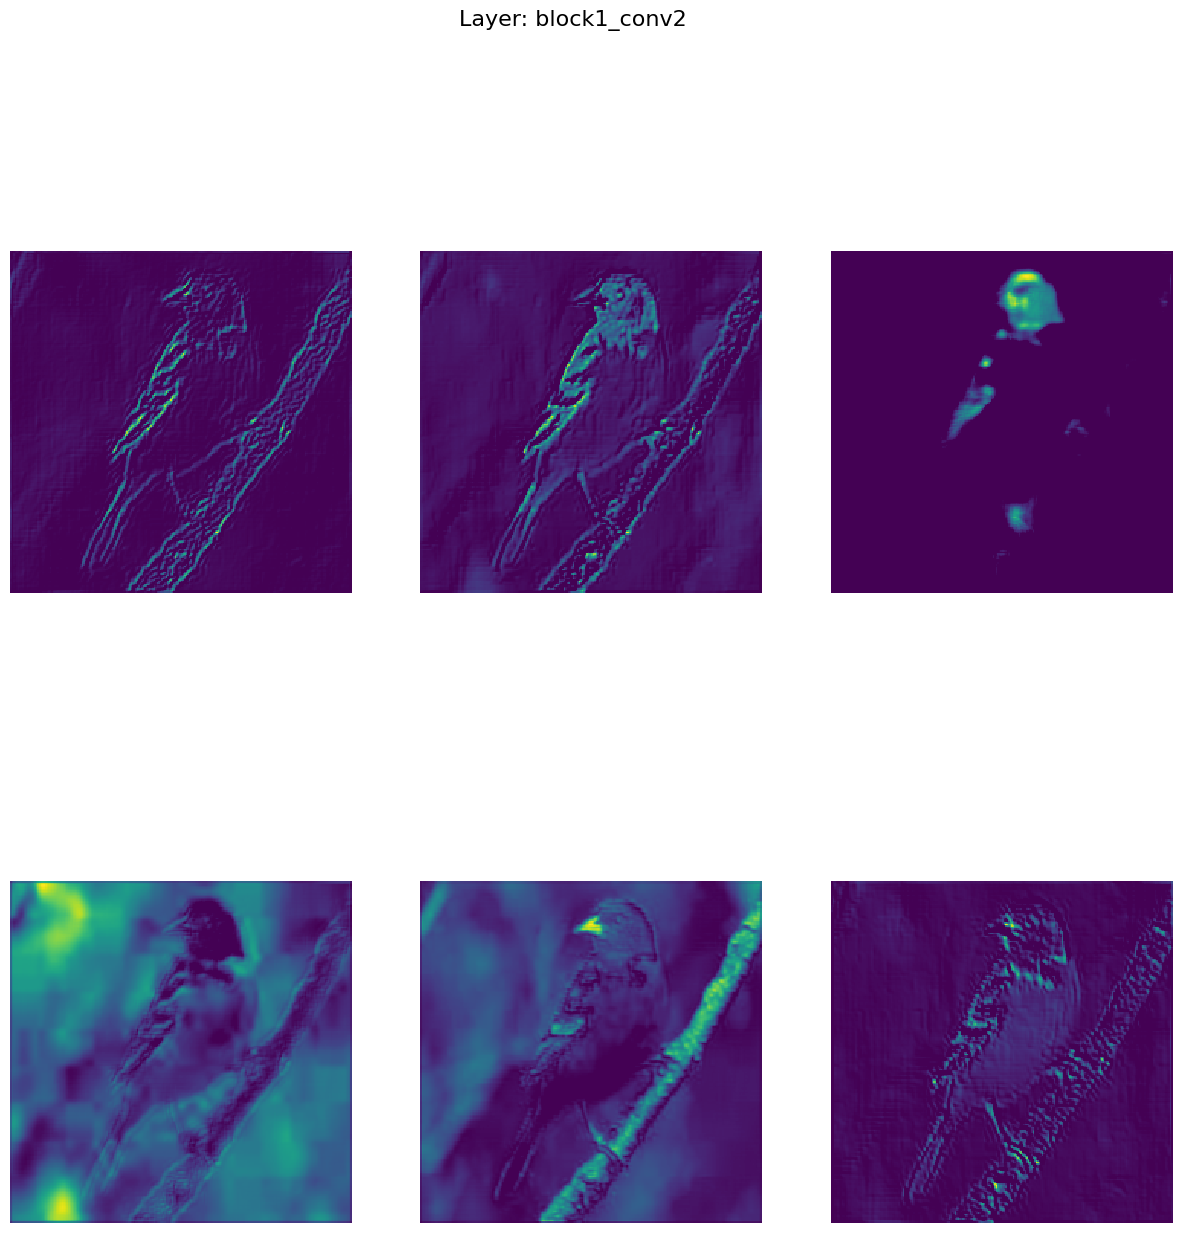

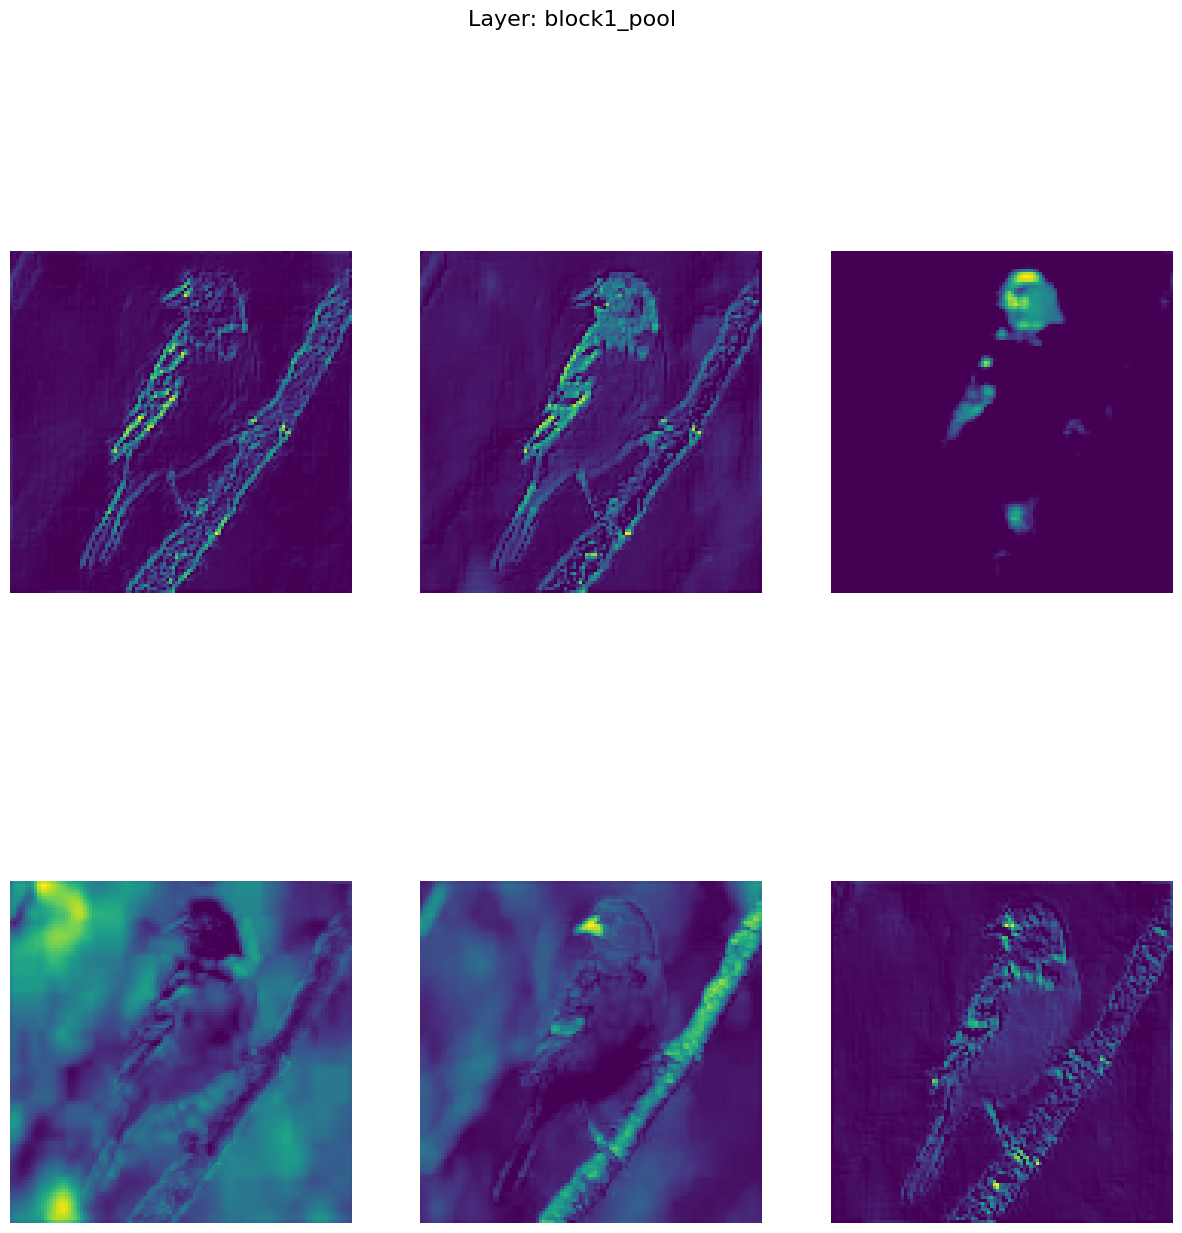

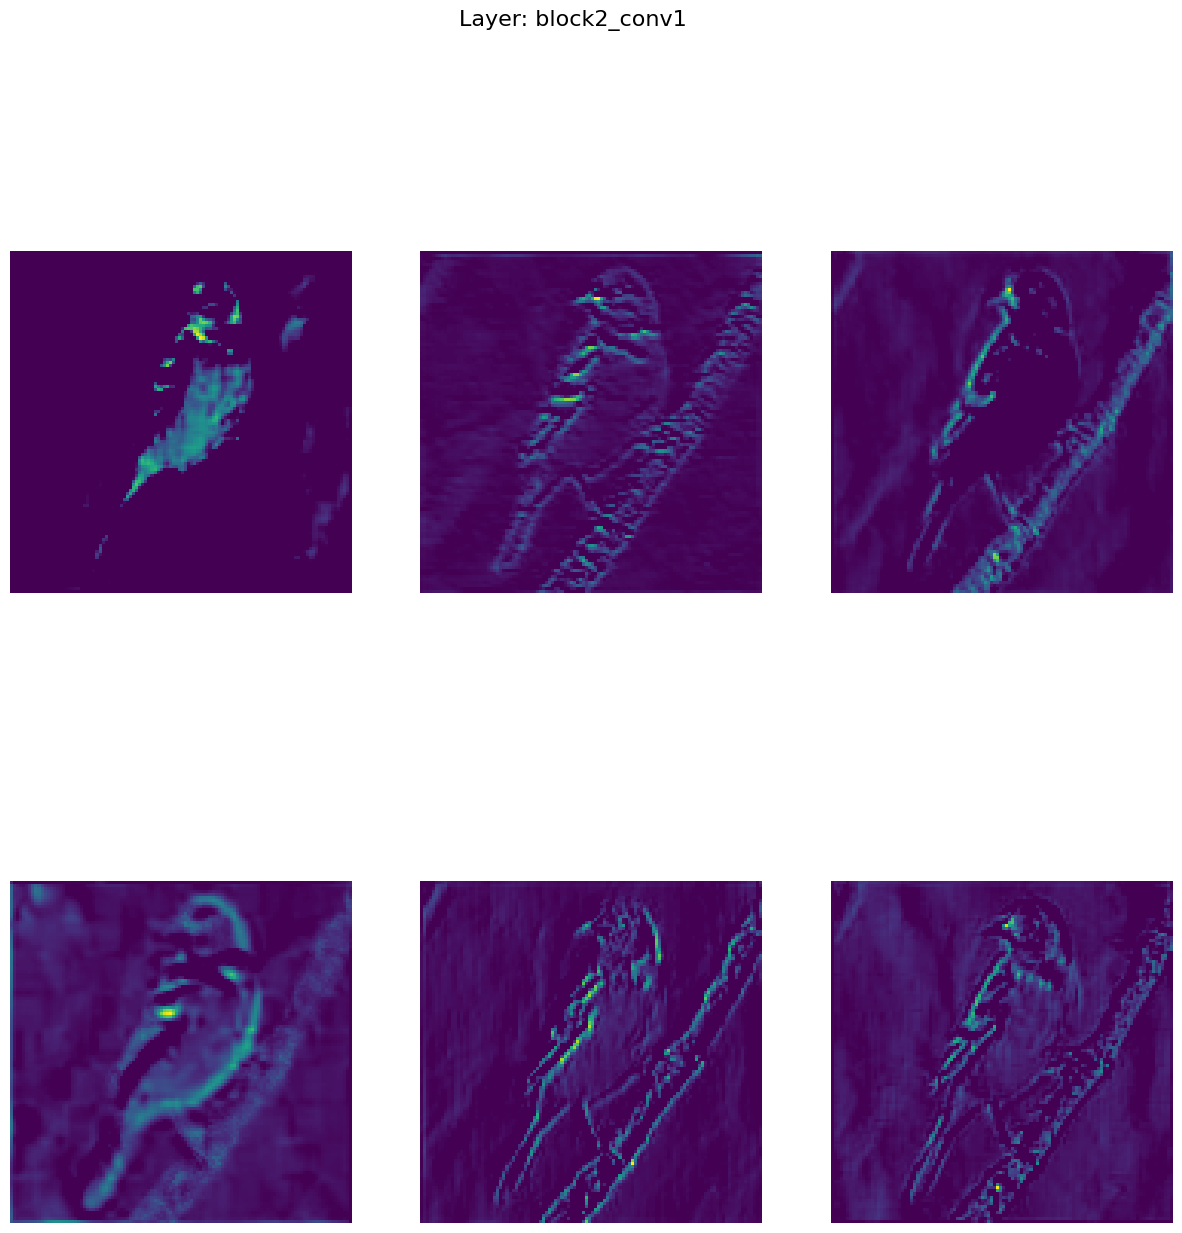

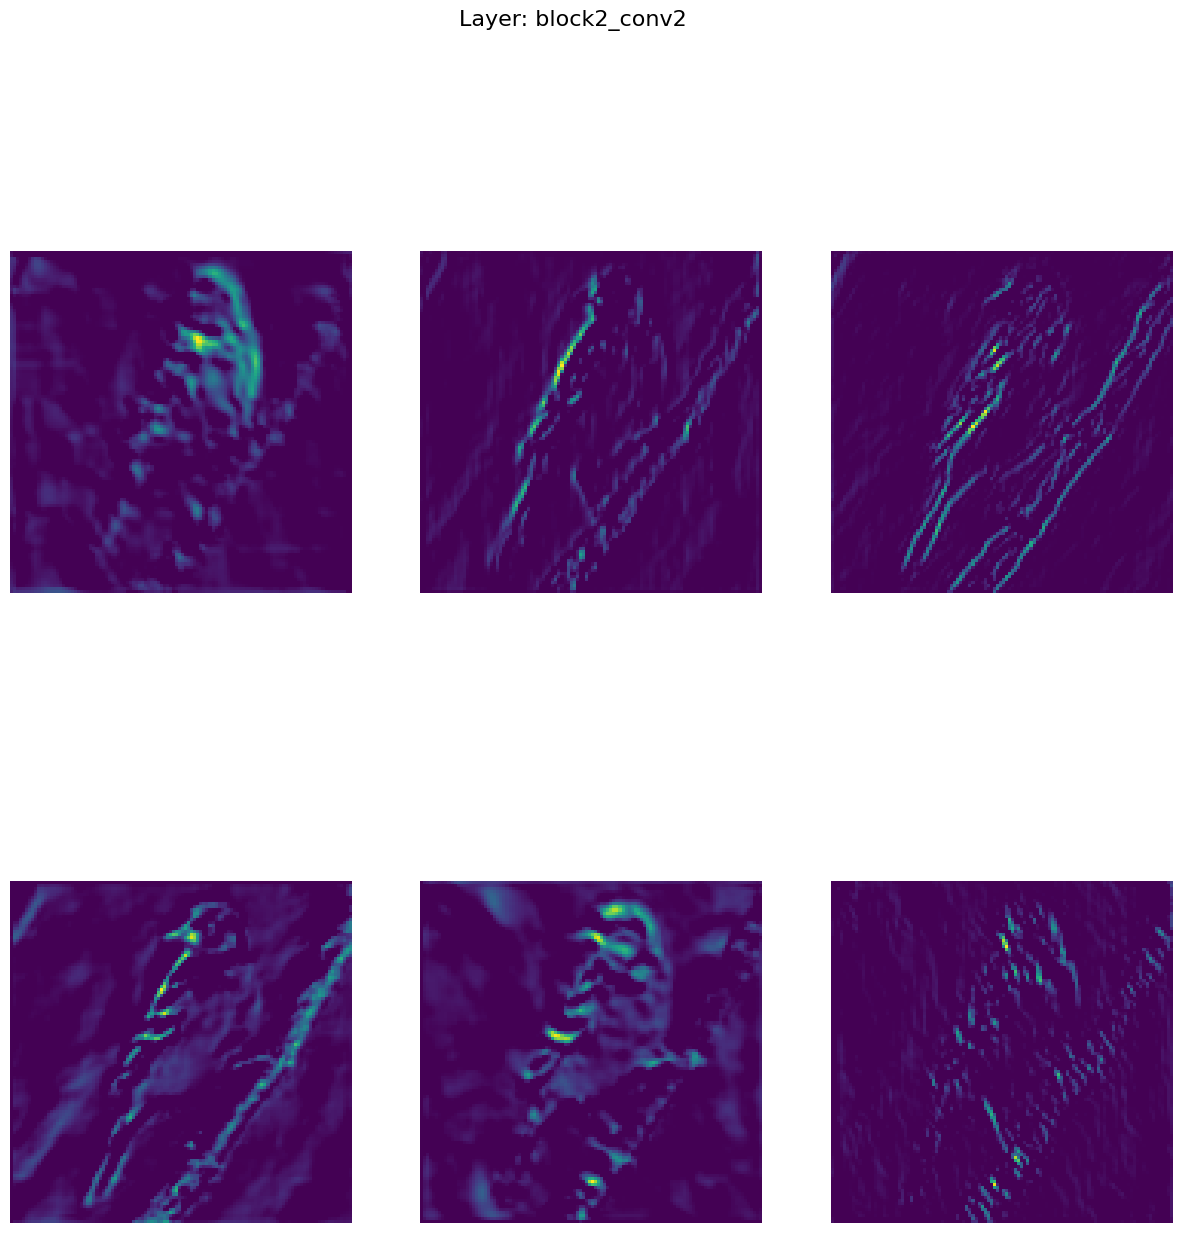

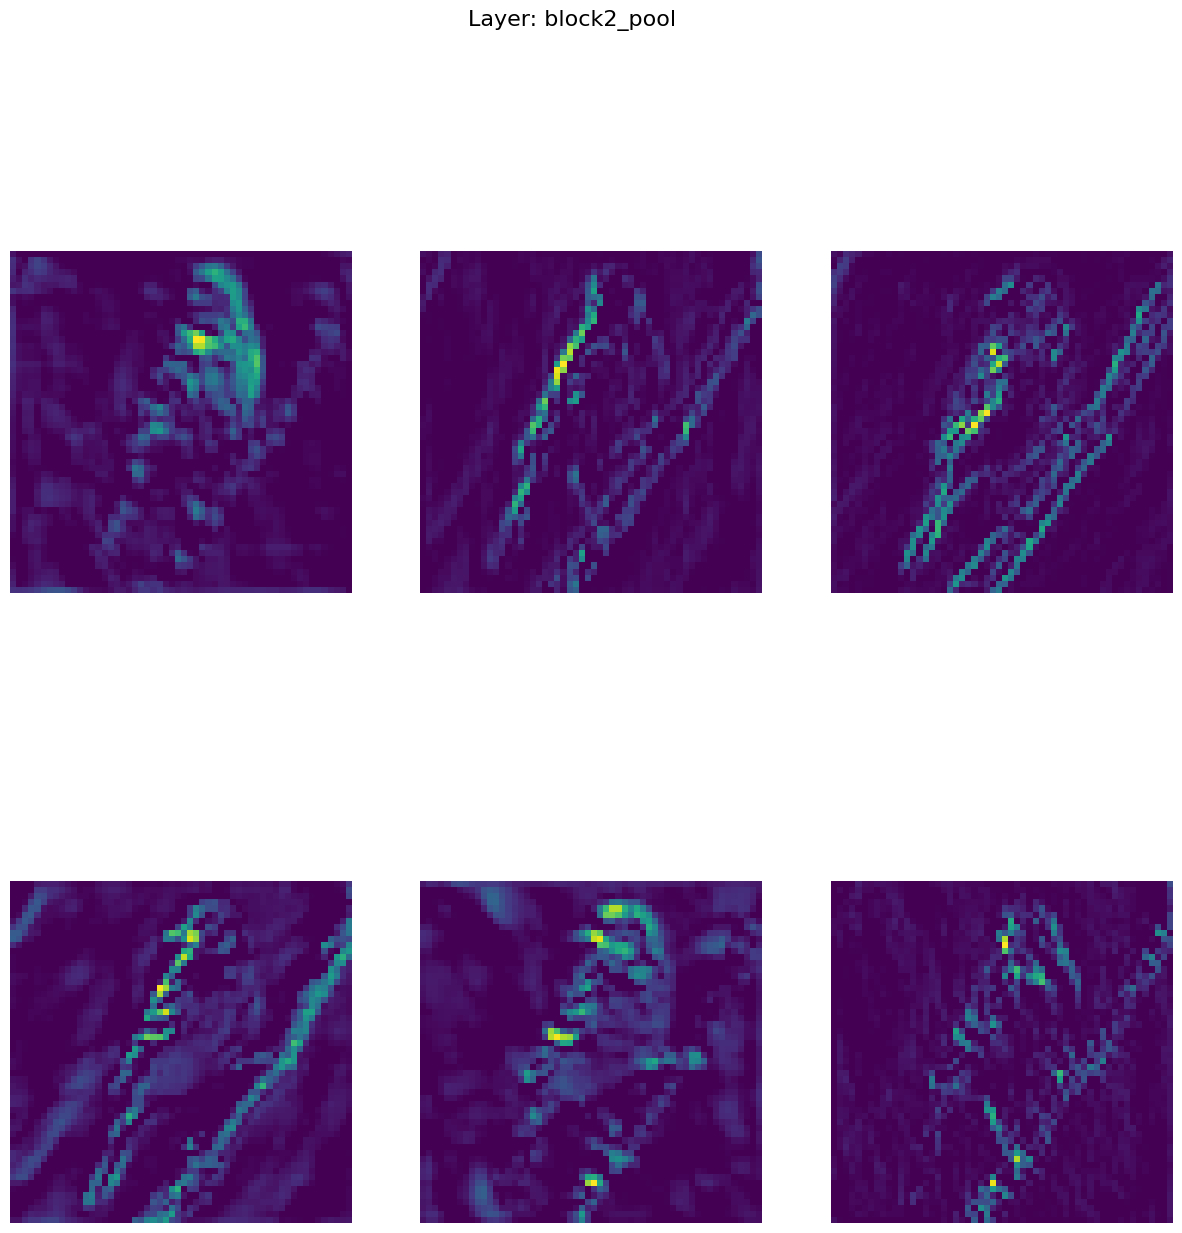

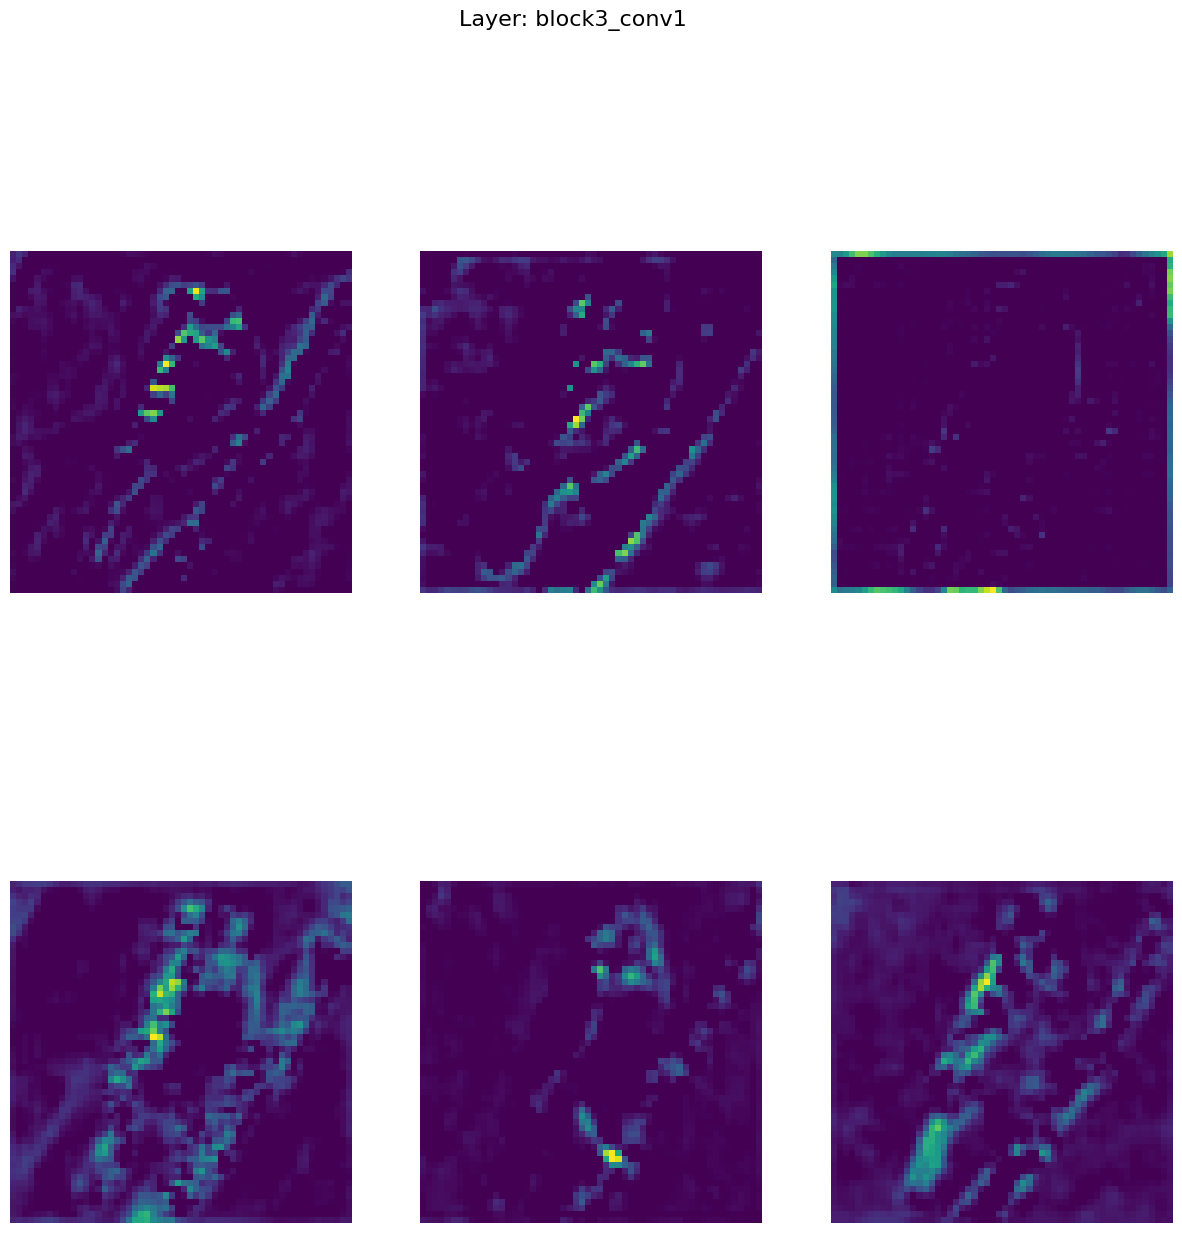

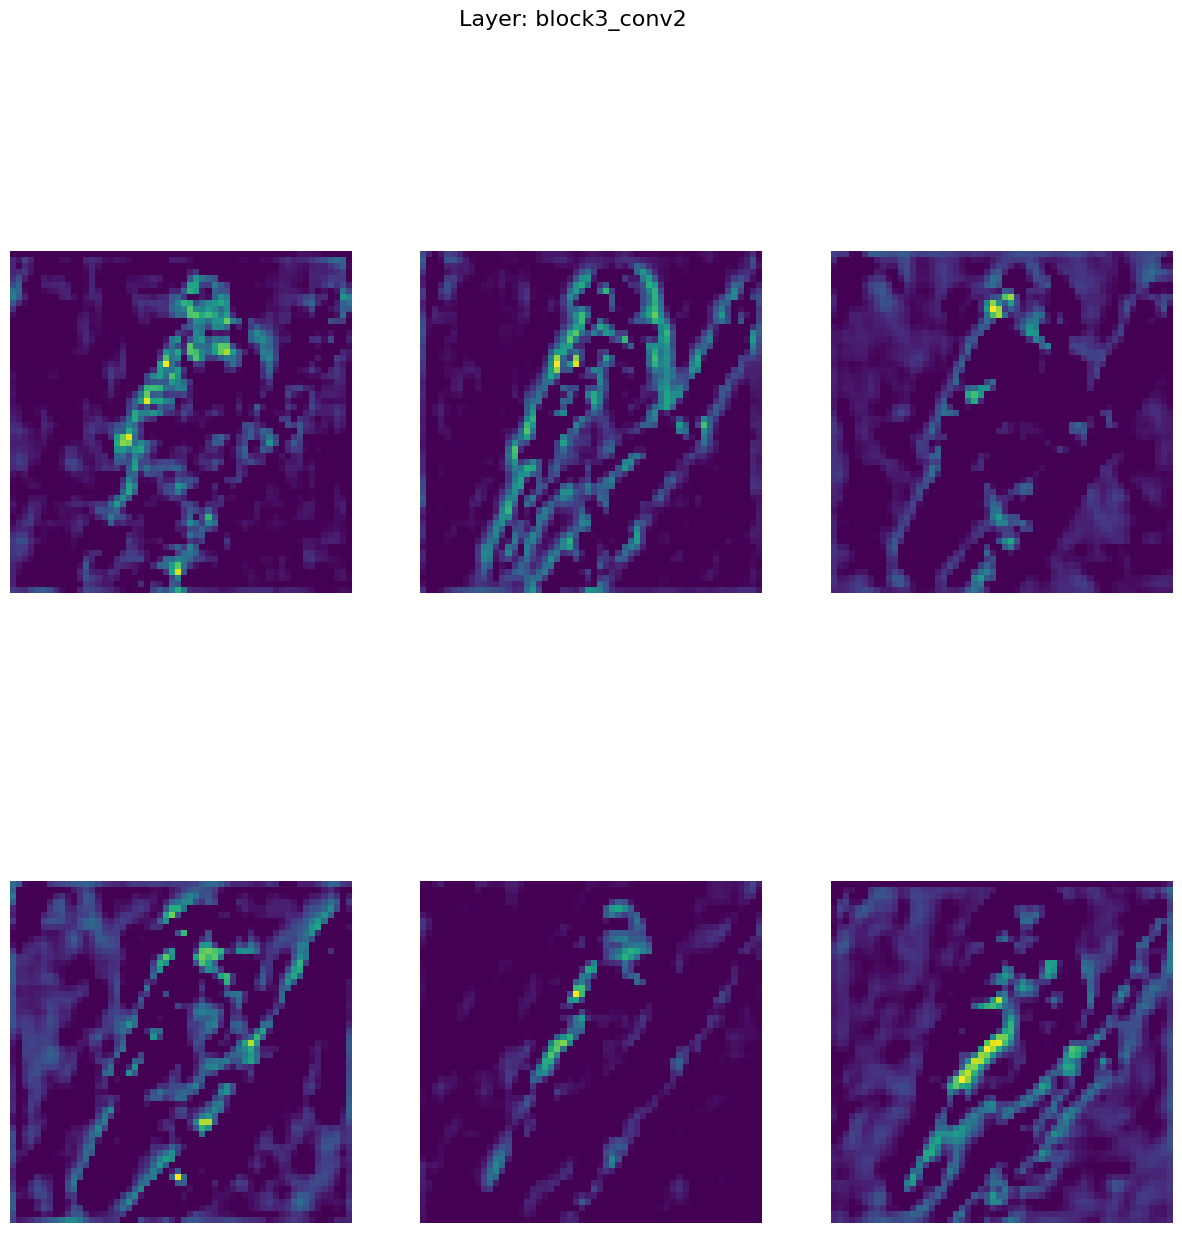

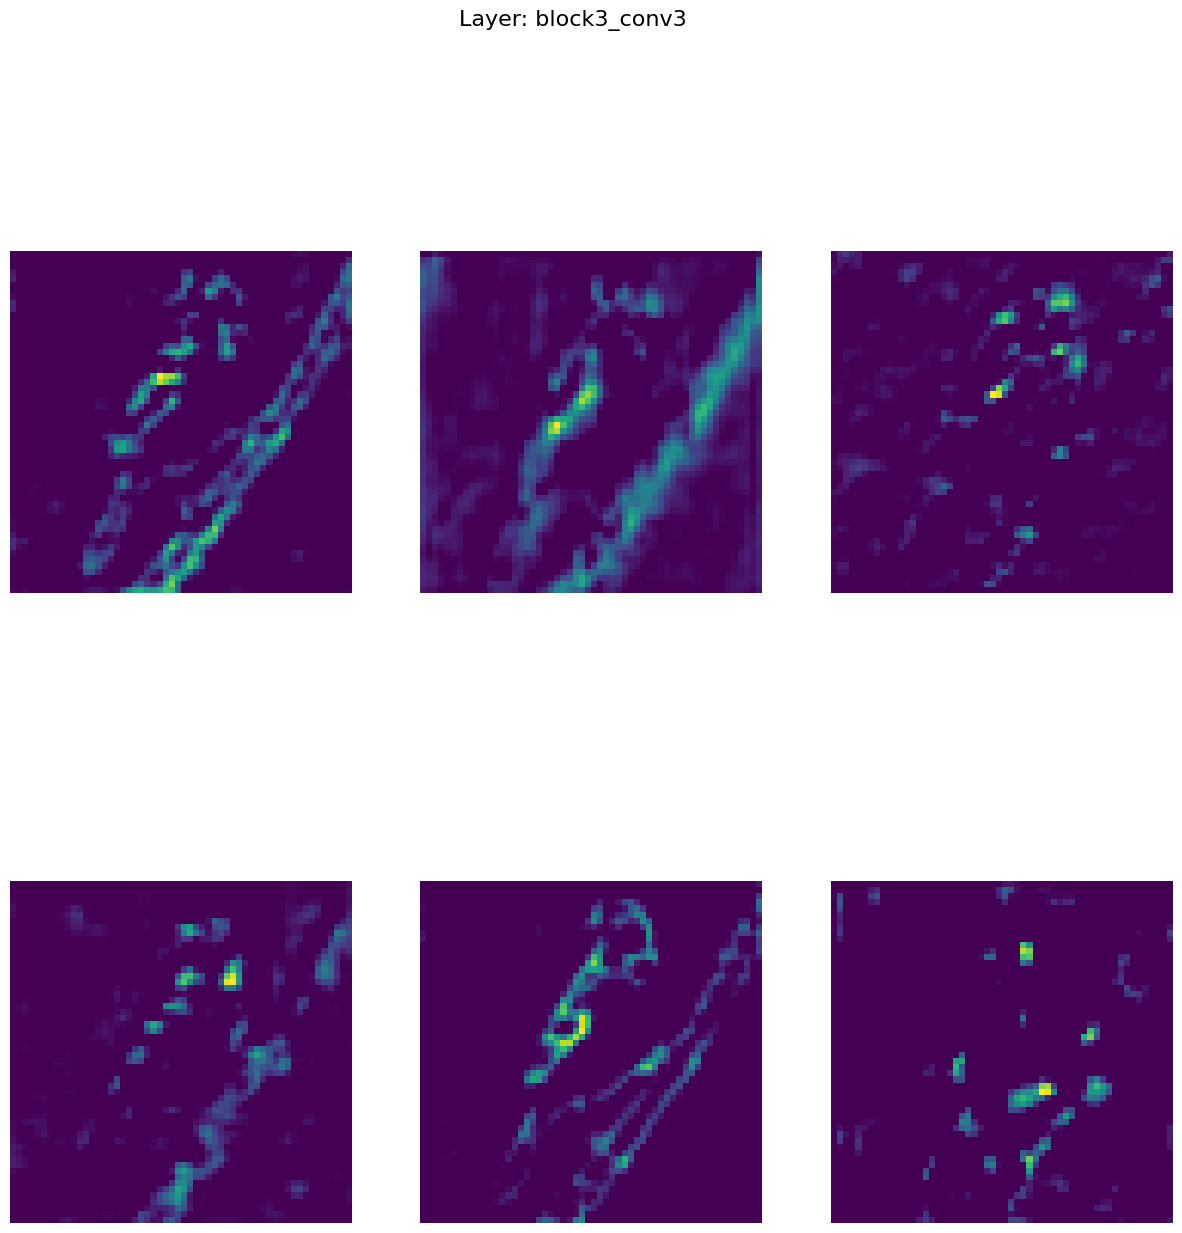

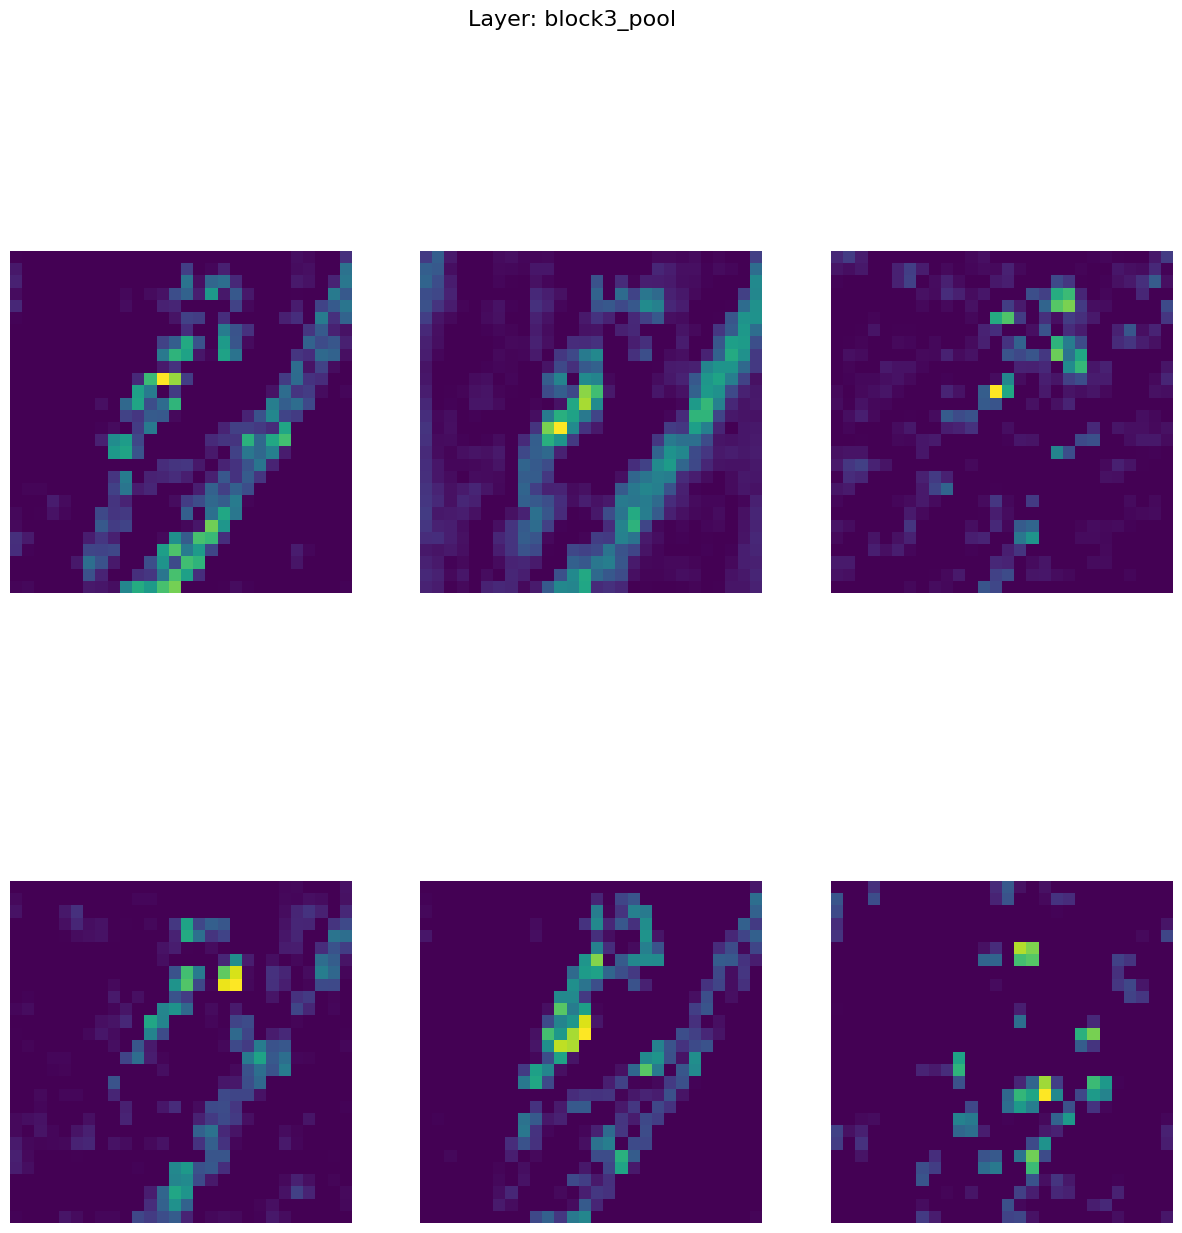

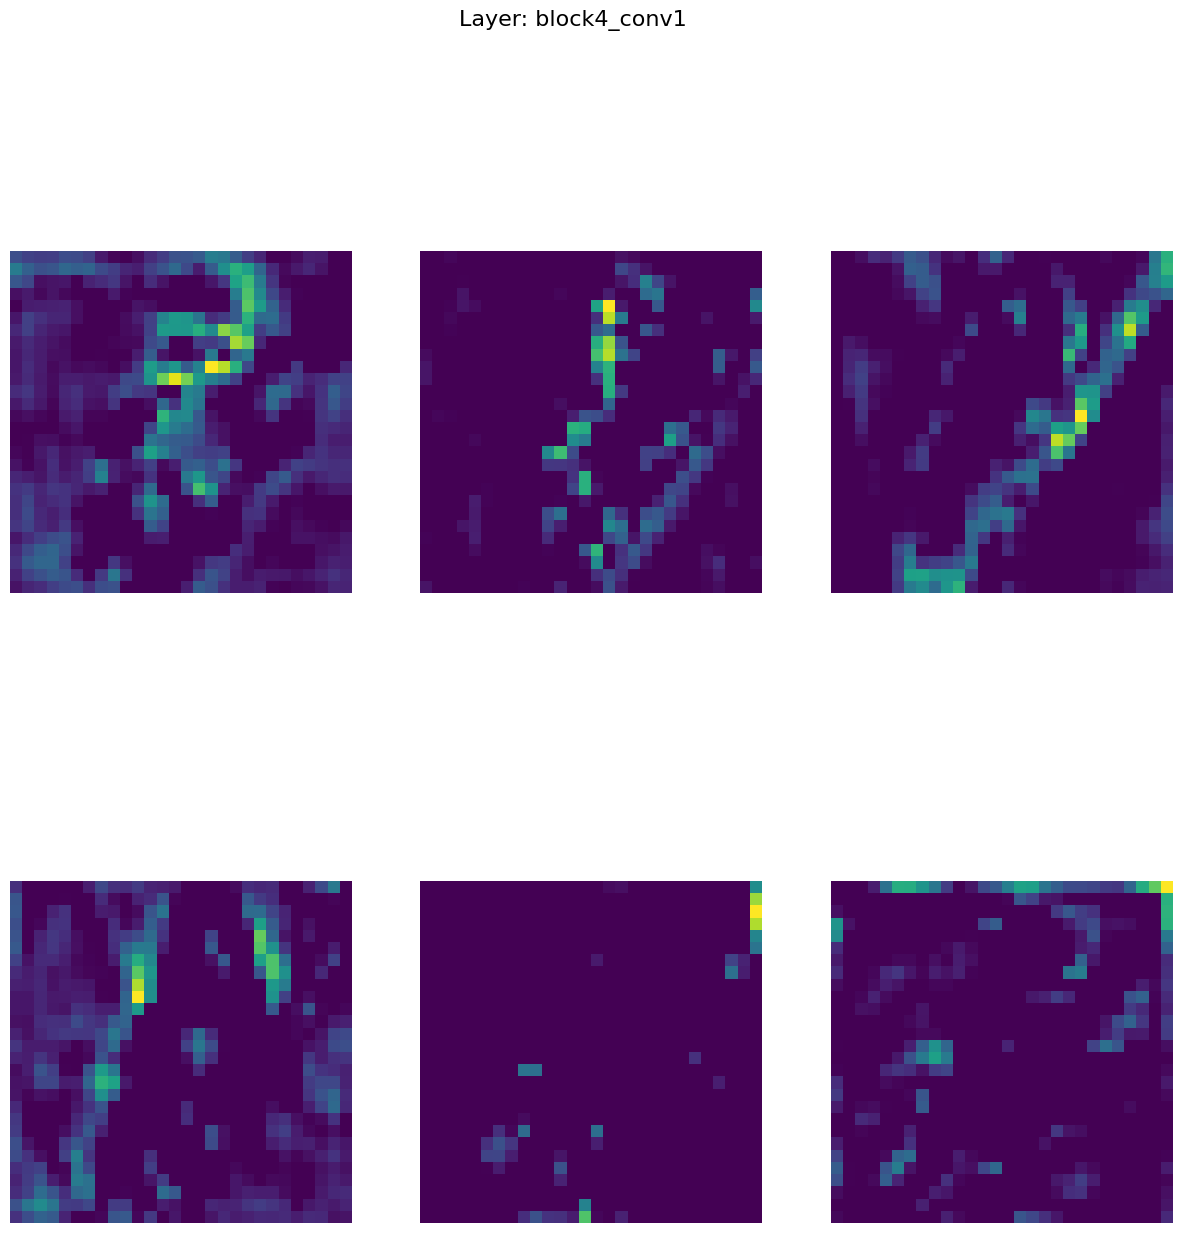

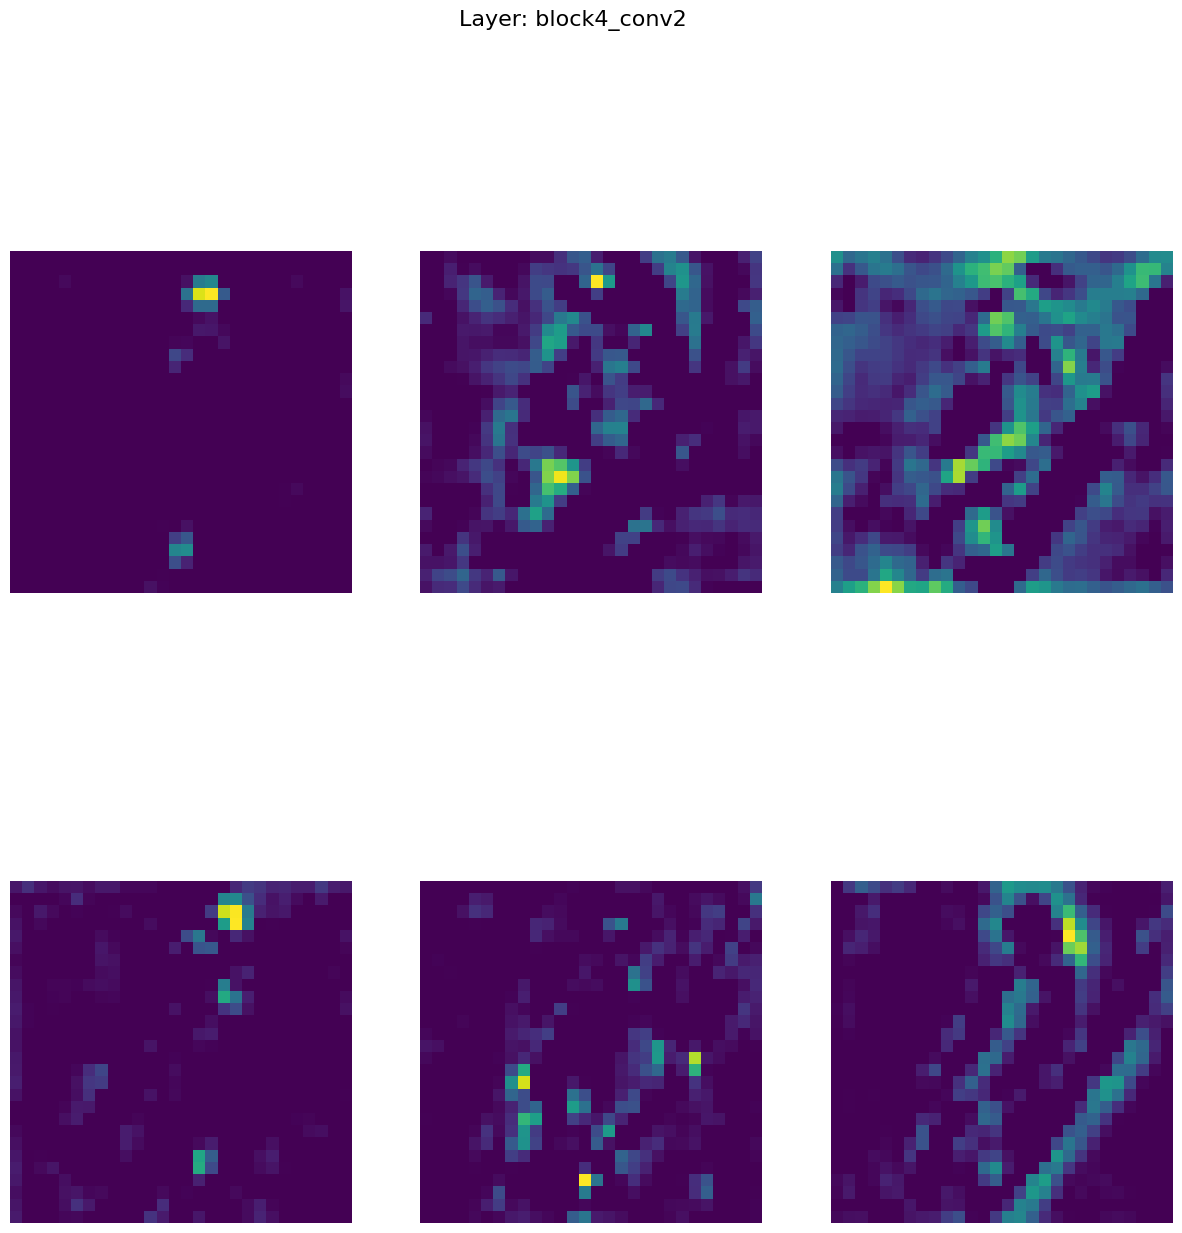

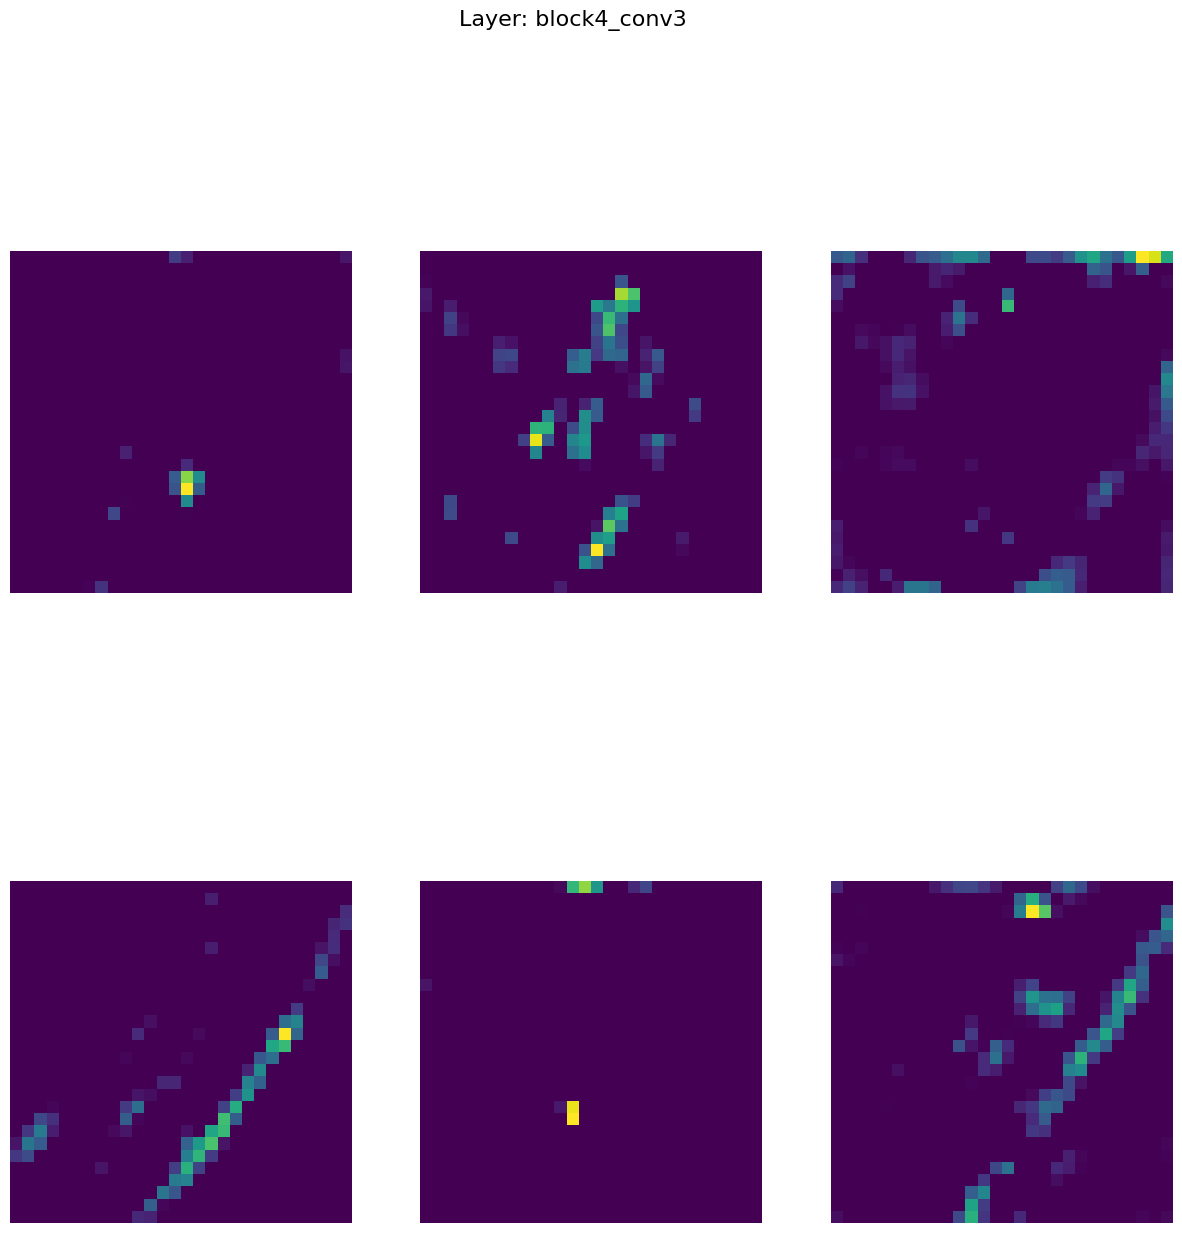

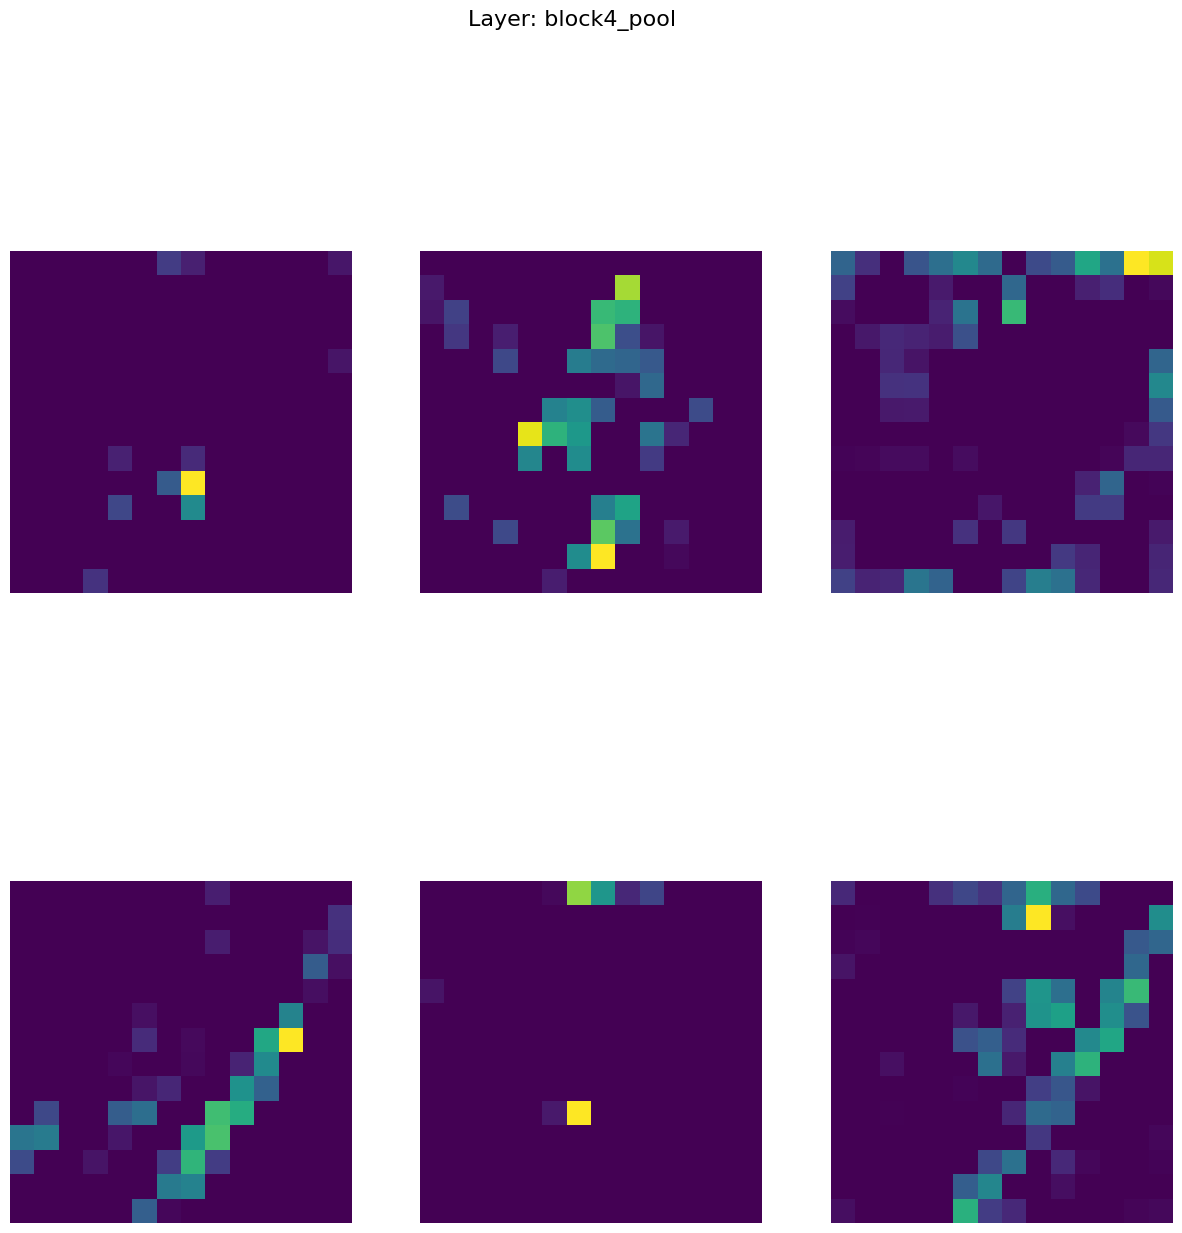

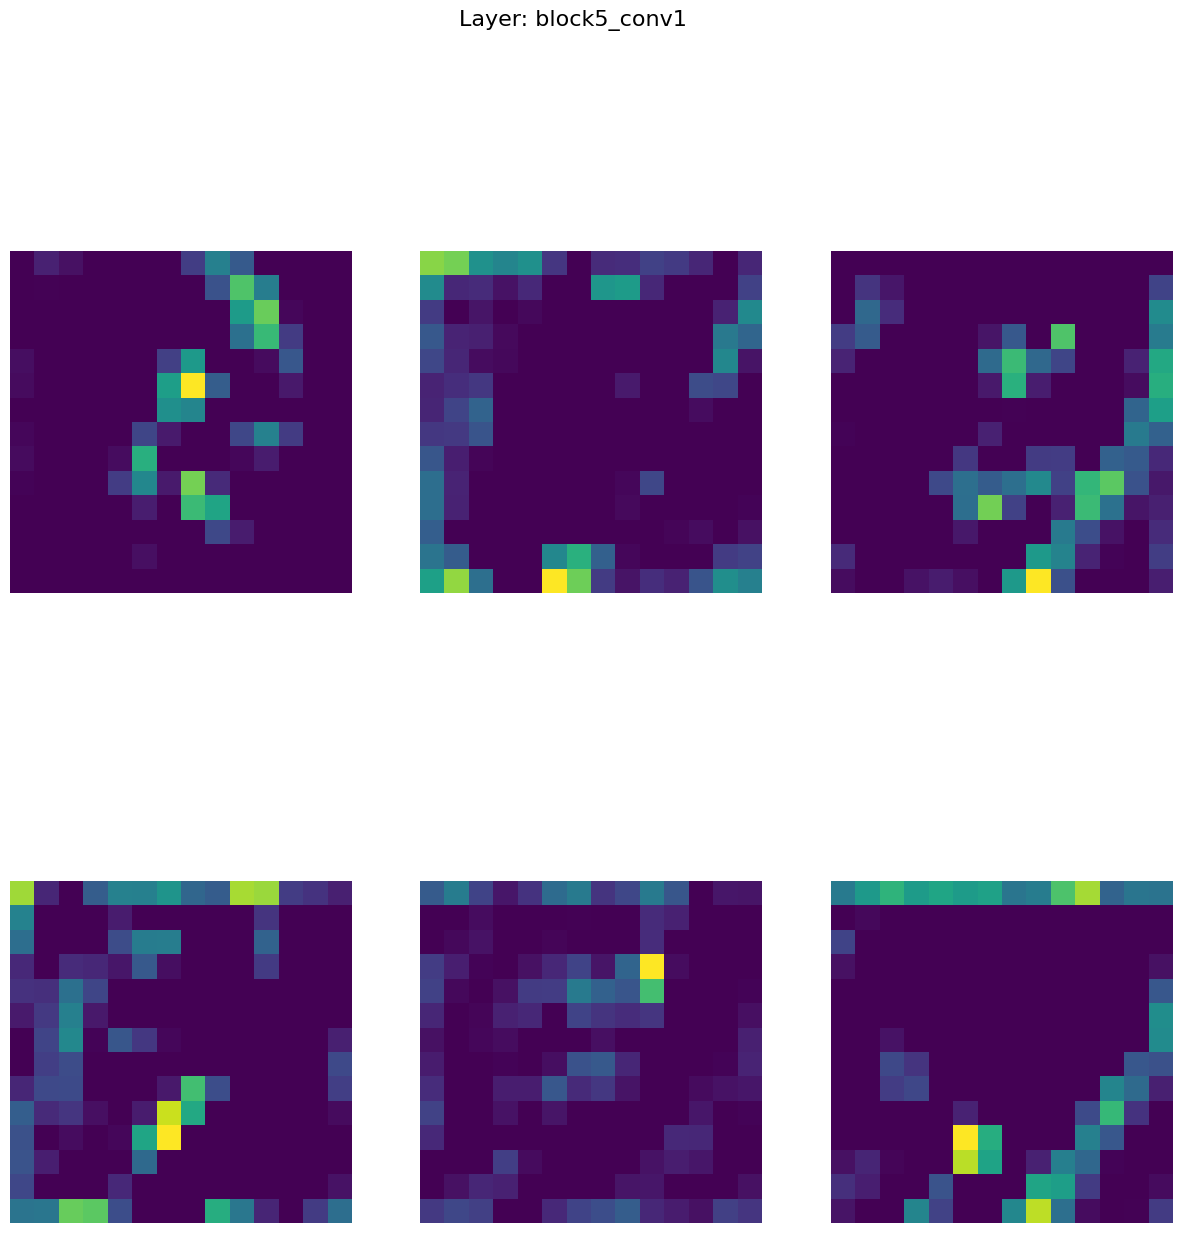

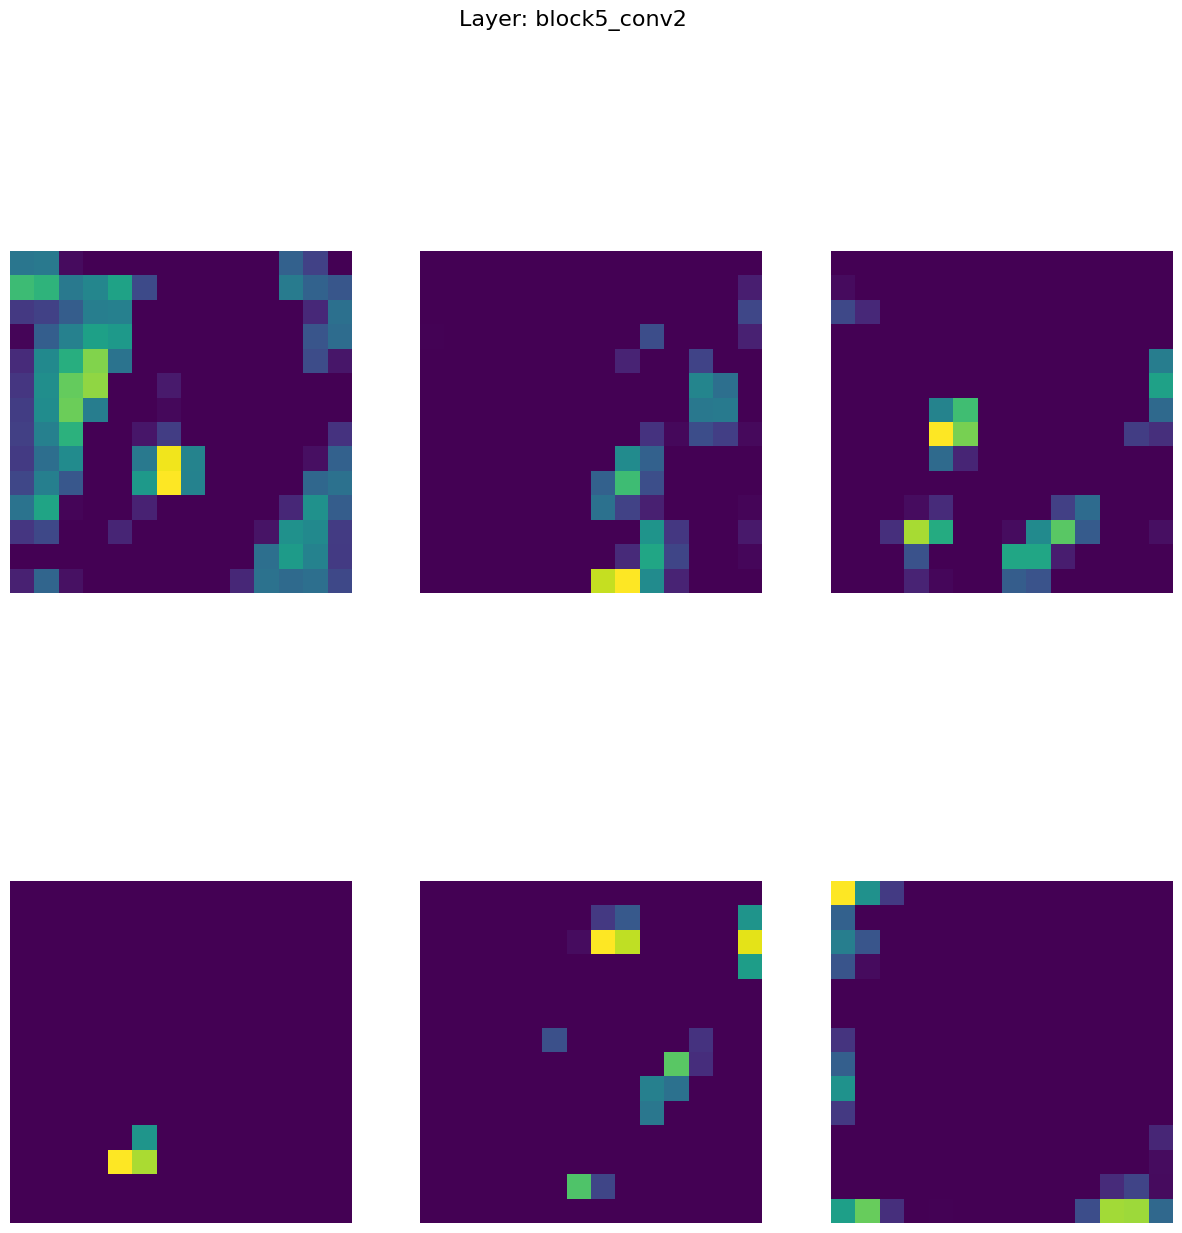

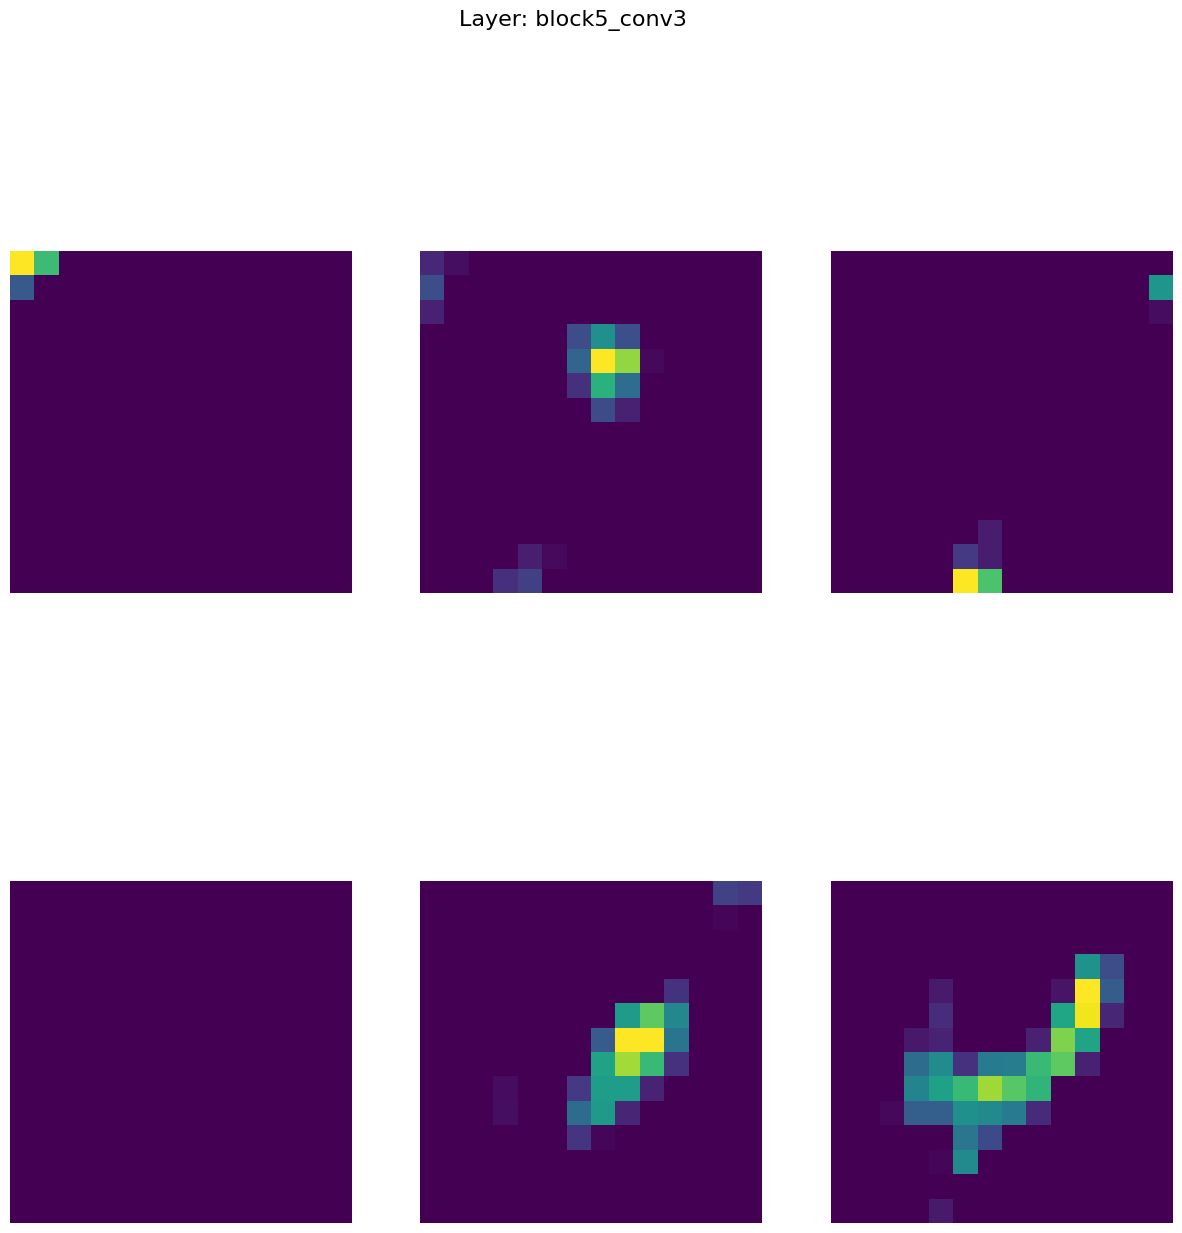

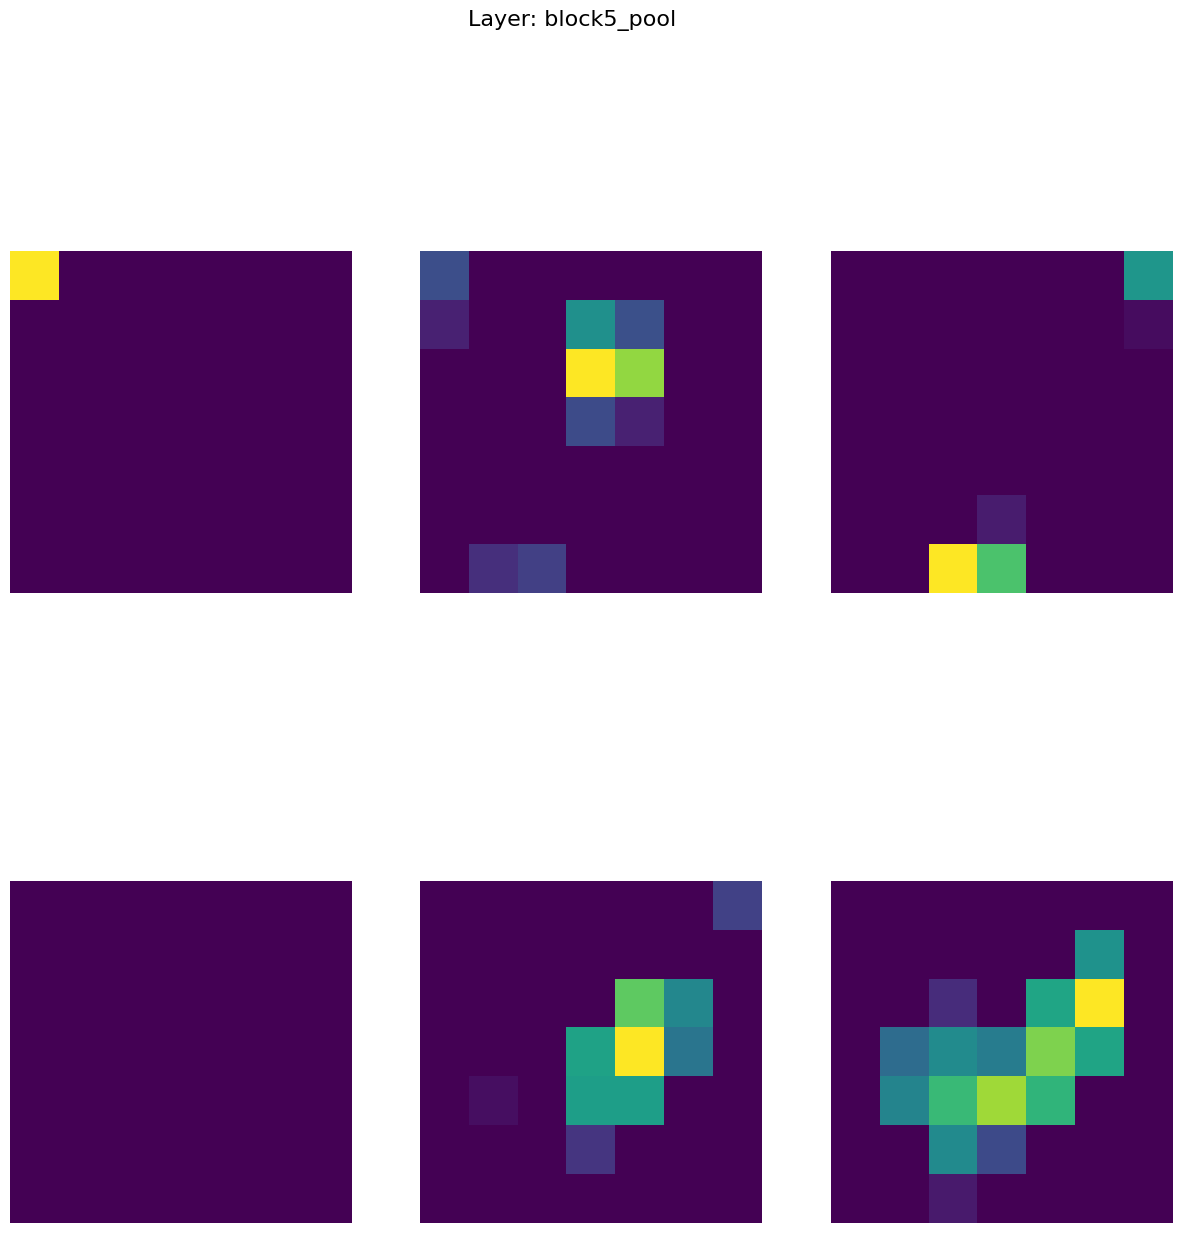

In [3]:
#mithila code vgg 16 cnn vuslization
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

model = VGG16(weights='imagenet', include_top=False)

img_path = 'bird.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_array)

def visualize_layer(layer_activations, layer_name, num_filters=6):
    num_filters_in_layer = layer_activations.shape[-1]
    num_filters = min(num_filters, num_filters_in_layer)
    n_cols = num_filters // 2 if num_filters > 1 else 1
    n_rows = num_filters // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    if num_filters == 1:
        axes = [axes]
    elif num_filters > 1 and isinstance(axes, plt.Axes):
        axes = [[axes]]

    axes = np.array(axes).reshape(n_rows, n_cols)

    for i in range(num_filters):
        ax = axes[i // n_cols, i % n_cols]
        ax.matshow(layer_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.suptitle(f'Layer: {layer_name}', fontsize=16)
    plt.show()

for layer_name, layer_activation in zip([layer.name for layer in model.layers], activations):
    if len(layer_activation.shape) == 4:
        visualize_layer(layer_activation, layer_name)
